<a href="https://colab.research.google.com/github/kozen88/Diabetes_Onward_Monitor/blob/main/diabetes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsione della progressione del diabete in pazienti a rischio

Il dataset diabetes di scikit-learn contiene degli esempi clinici di pazienti affetti da diabete. È un dataset di regressione il cui target è una misura quantitativa che rappresenta la progressione della malattia.<br>
<br>

Si può caricare mediante l’import seguente: from sklearn.datasets import load_diabetes e poi usando la funzione load_diabetes per ottenere i vari dati (maggiori dettagli nella documentazione ufficiale: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html).<br>
<br>

Le colonne del dataset sono le seguenti:<br>
1. age: età
2. sex: genere di sesso
3. bmi: indice di massa corporea
4. bp: pressione sanguigna media
5. s1: colesterolo sierico totale
6. s2: lipoproteine ​​a bassa densità
7. s3: lipoproteine ​​ad alta densità
8. s4: colesterolo totale/HDL
9. s5: trigliceridi
10. s6: glicemia<br>
<br>

--------

**Devi realizzare un modello di regressione che, partendo da questo dataset, provi a prevedere il target.**<br>

**Spiega i vari passaggi della realizzazione del modello e di selezione delle variabili e commenta i risultati ottenuti.**


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Lets start with importing the date and exctract a dataframe pandas which contain the dataset with the feauters and target.

In [2]:
# getting a bunch object similar to a dictonary in python
diabetes_bunch = load_diabetes(as_frame=True, scaled=False)

In [3]:
# take a look at the type
print(type(diabetes_bunch))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
help('sklearn.utils._bunch.Bunch')

Help on class Bunch in sklearn.utils._bunch:

sklearn.utils._bunch.Bunch = class Bunch(builtins.dict)
 |  sklearn.utils._bunch.Bunch(**kwargs)
 |  
 |  Container object exposing keys as attributes.
 |  
 |  Bunch objects are sometimes used as an output for functions and methods.
 |  They extend dictionaries by enabling values to be accessed by key,
 |  `bunch["value_key"]`, or by an attribute, `bunch.value_key`.
 |  
 |  Examples
 |  --------
 |  >>> from sklearn.utils import Bunch
 |  >>> b = Bunch(a=1, b=2)
 |  >>> b['b']
 |  2
 |  >>> b.b
 |  2
 |  >>> b.a = 3
 |  >>> b['a']
 |  3
 |  >>> b.c = 6
 |  >>> b['c']
 |  6
 |  
 |  Method resolution order:
 |      Bunch
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __dir__(self)
 |      Default dir() implementation.
 |  
 |  __getattr__(self, key)
 |  
 |  __init__(self, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      Im

In [5]:
# extracction of the dataframe wanted
df = diabetes_bunch.data

In [6]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [7]:
print(f"The dataset is composed of {df.shape[0]} raws and {df.shape[1]} columns.")

The dataset is composed of 442 raws and 10 columns.


In [8]:
# lets save the dataset we have extract into a file for future use
df.to_csv("diabetes.csv", index=False)

df.to_excel("diabetes.xlsx", index=False)

In [9]:
# Lets change the name of same columns to be more significant
new_name = ['cholesterol', 'LDL', 'HDL', 'Trig', 'CF-HDL', 'glucose']
df = df.rename(columns={'s1': new_name[0], 's2': new_name[1], 's3': new_name[2], 's4': new_name[3], 's5': new_name[4], 's6': new_name[5]})

In [10]:
df

,age,sex,bmi,bp,cholesterol,LDL,HDL,Trig,CF-HDL,glucose
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


The new name for the features have been chosen from the following website:<br>
[blood text abbreviation](https://www.yourdictionary.com/articles/blood-tests-abbreviations)

## Basic Data exploration
We are going to perform a bunch of operation which allow us tto take a look at the data types and also to consider how the data are distributed and how much ours features are correlated to each other.

In [11]:
# statistics summarization
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,48.518100,13.109028,19.0000,38.2500,50.00000,59.0000,79.000
sex,442.0,1.468326,0.499561,1.0000,1.0000,1.00000,2.0000,2.000
bmi,442.0,26.375792,4.418122,18.0000,23.2000,25.70000,29.2750,42.200
bp,442.0,94.647014,13.831283,62.0000,84.0000,93.00000,105.0000,133.000
cholesterol,442.0,189.140271,34.608052,97.0000,164.2500,186.00000,209.7500,301.000
LDL,442.0,115.439140,30.413081,41.6000,96.0500,113.00000,134.5000,242.400
HDL,442.0,49.788462,12.934202,22.0000,40.2500,48.00000,57.7500,99.000
Trig,442.0,4.070249,1.290450,2.0000,3.0000,4.00000,5.0000,9.090
CF-HDL,442.0,4.641411,0.522391,3.2581,4.2767,4.62005,4.9972,6.107
glucose,442.0,91.260181,11.496335,58.0000,83.2500,91.00000,98.0000,124.000


In [12]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   cholesterol  442 non-null    float64
 5   LDL          442 non-null    float64
 6   HDL          442 non-null    float64
 7   Trig         442 non-null    float64
 8   CF-HDL       442 non-null    float64
 9   glucose      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [13]:
# double check on the Nan values
df.isna().sum()

age            0
sex            0
bmi            0
bp             0
cholesterol    0
LDL            0
HDL            0
Trig           0
CF-HDL         0
glucose        0
dtype: int64

**NOTE**:<br>
From the first retrivial of the information about our dataset we can conclude that all variable are numeric in particular float64, although the variable sex in a categoric numerical which can take the value 2.0 or 1.0 for different sex, there are no missing values and the features have different order of magnitude as hightlighted by the statistical summarization.


The next step will be to visualize the distribution on the features taken pair by pair and check if there are significant correlation, after this step we will calculate the correlation  matrix to quantify all possible correlations.

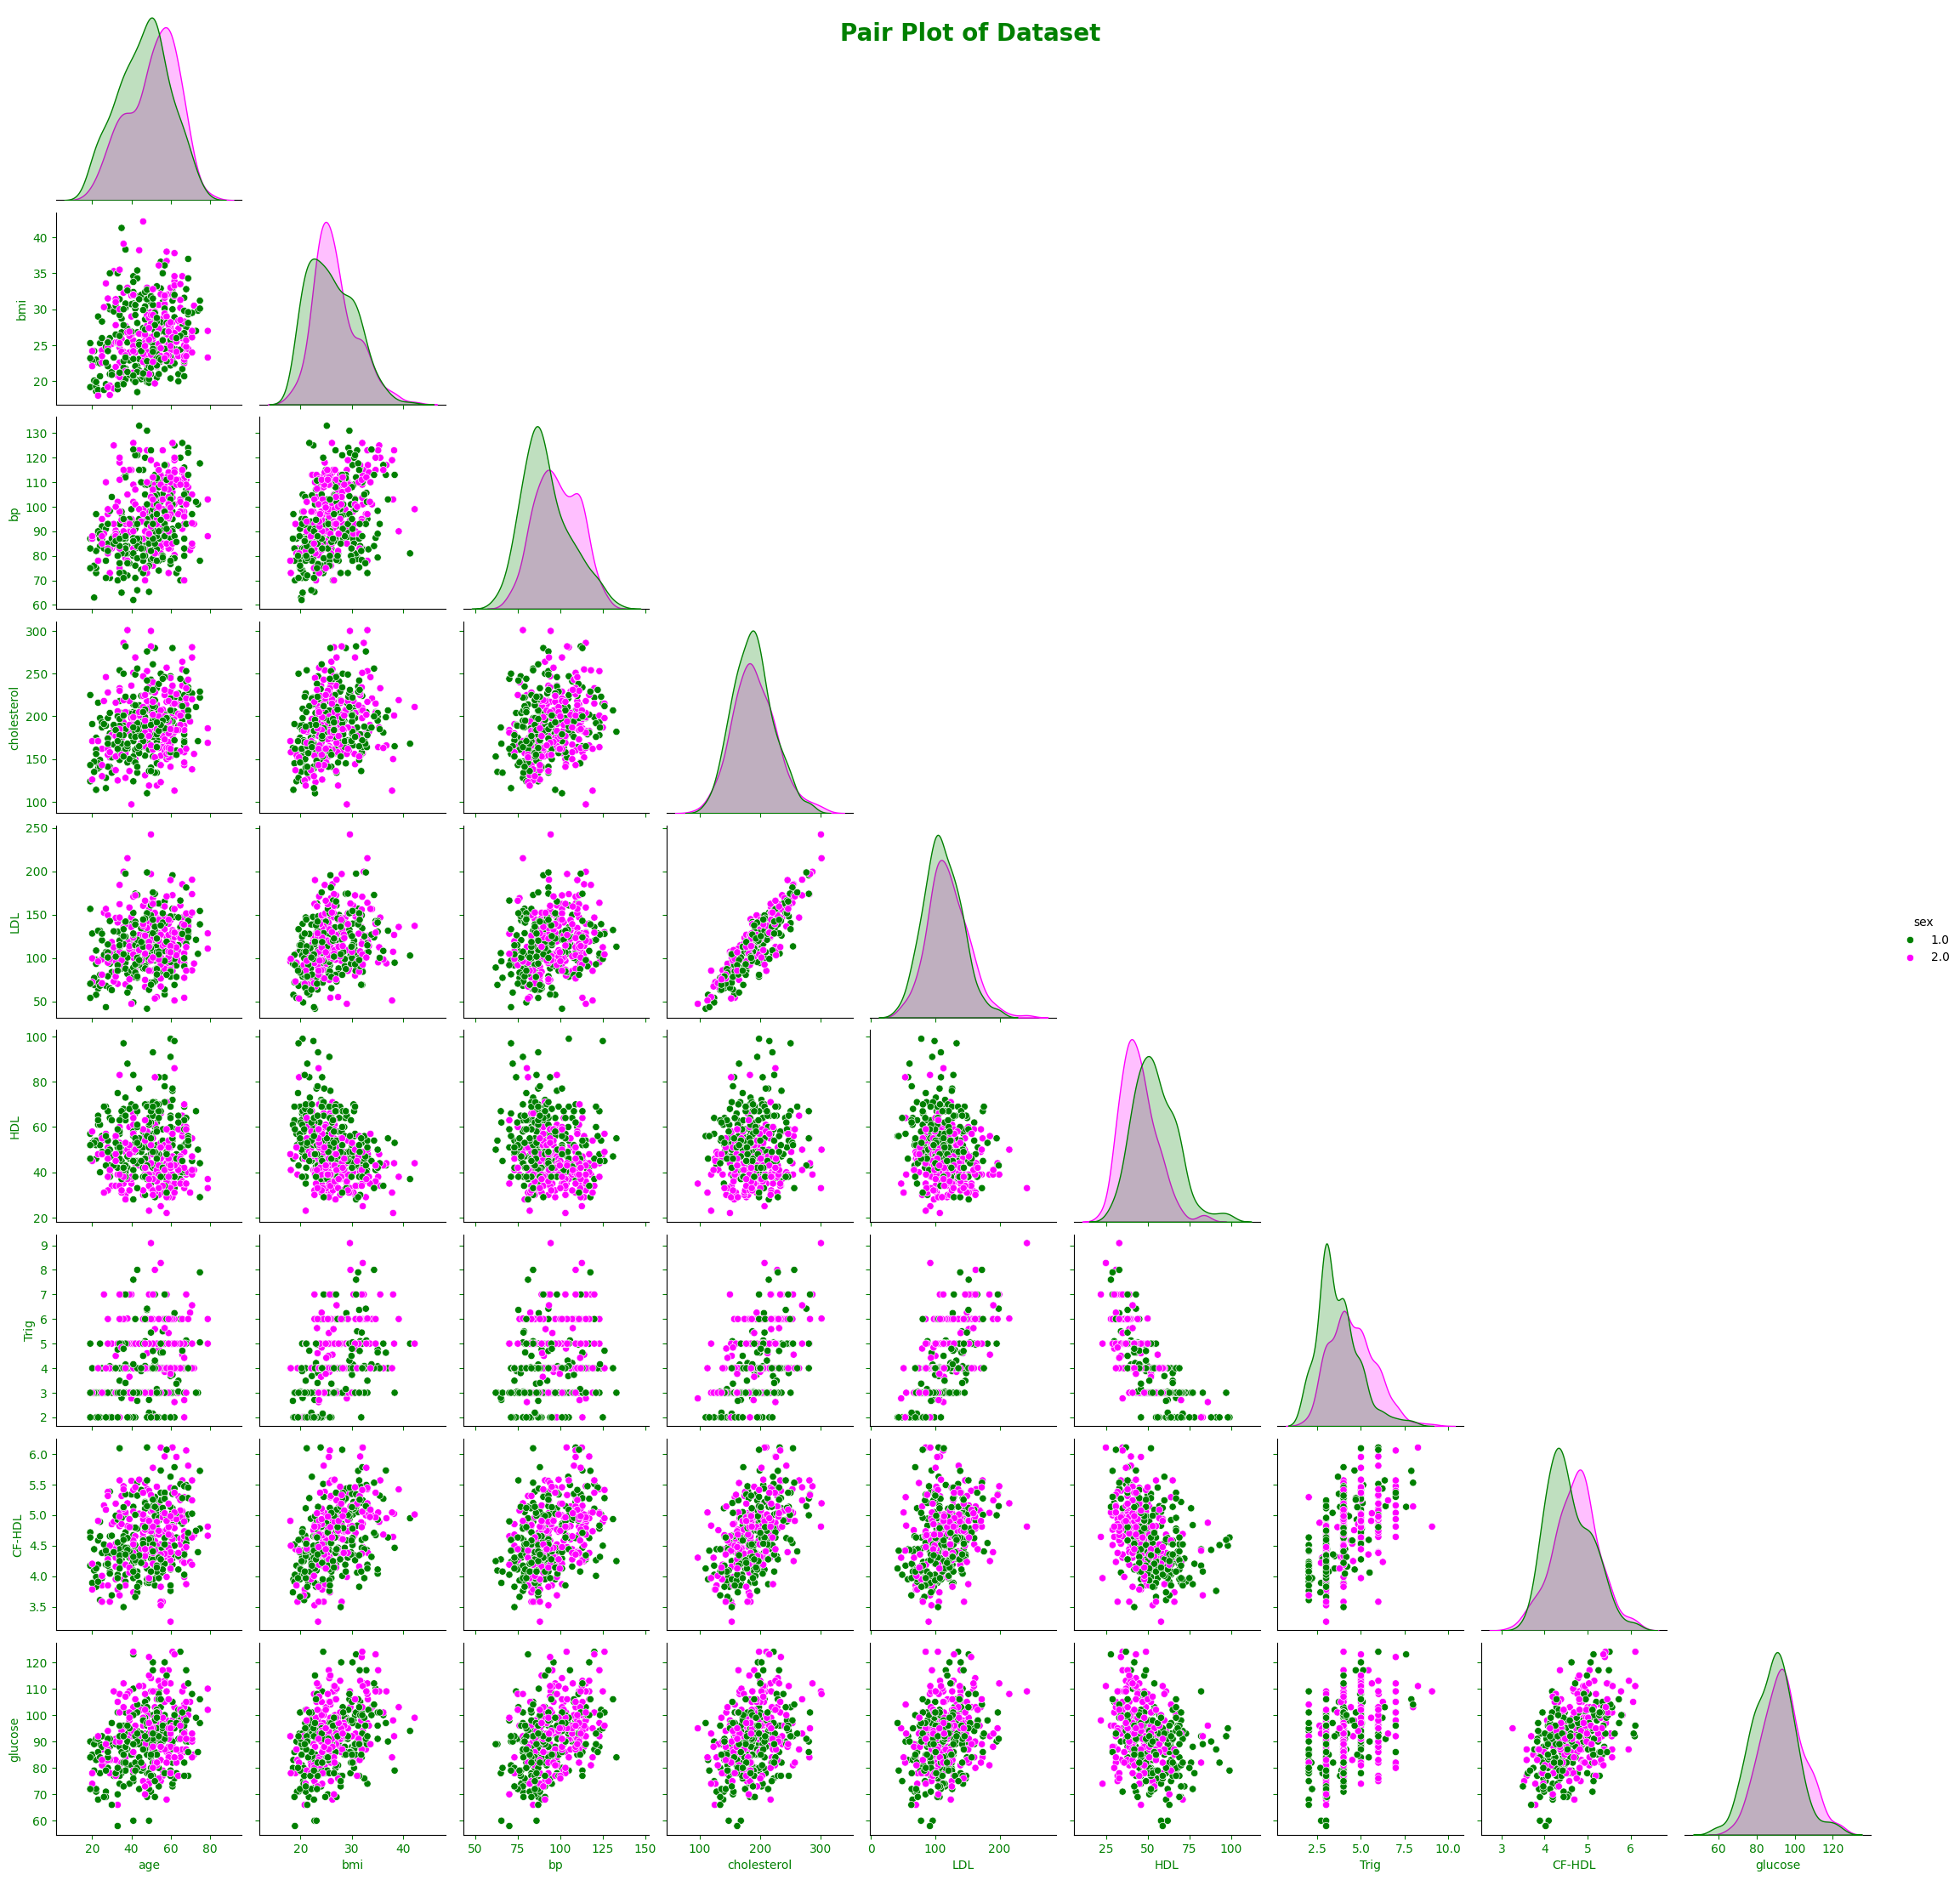

In [14]:
# Lets generate the pair plot which is a scatter plot for each pair of feature present in the dataset
# we are setting a different color for male and female obseravation
sns.pairplot(df, corner=True, hue='sex', palette={1.0: 'green', 2.0: 'fuchsia'})
plt.suptitle('Pair Plot of Dataset', fontsize=20, color="green", fontweight='bold')

for ax in plt.gcf().get_axes():
    ax.tick_params(axis='both', colors='green')
    ax.set_xlabel(ax.get_xlabel(), color='green')
    ax.set_ylabel(ax.get_ylabel(), color='green')

plt.show()

**NOTE**<br>
From the pair plot generated we can see there is a strong linear correlation between LDL and cholesterol, while other linear influence can be detected between glucose and CF-HDL, glucose and LDL, glucose and bmi.

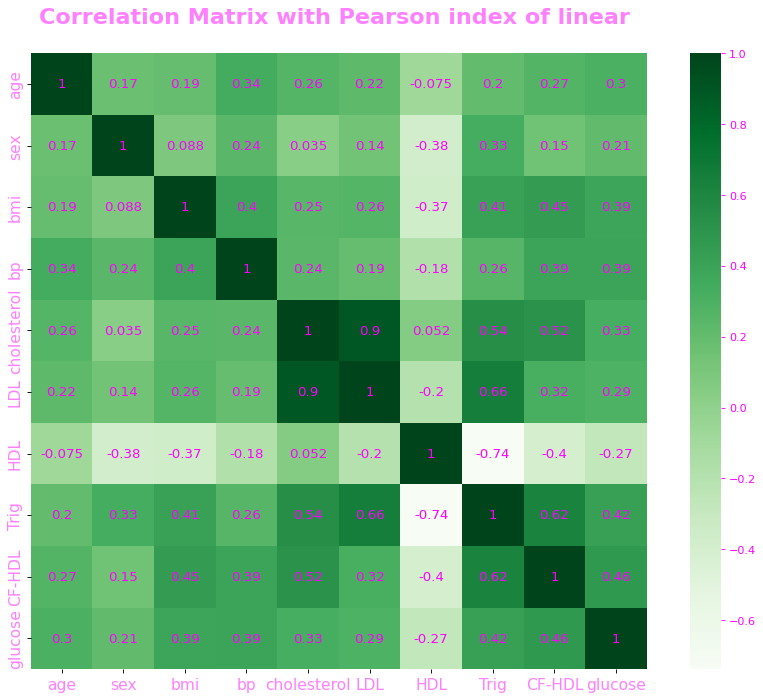

In [15]:
plt.figure(figsize=(14, 10), dpi=80)

# define a particular color
light_fuchsia = '#FF80FF'

correlation_matrix = df.corr()

# Now lets quantify the correlation
hm = sns.heatmap(correlation_matrix,
                 cmap='Greens',
                 cbar=True,
                 square=True,
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 annot=True,
                 annot_kws={'size':12, 'color':'fuchsia'})

# Set the colobar
cbar = hm.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='fuchsia', labelcolor='fuchsia')

# Set the labels
hm.set_xticklabels(hm.get_xticklabels(), color=light_fuchsia, fontsize=14)
hm.set_yticklabels(hm.get_yticklabels(), color=light_fuchsia, fontsize=14)

plt.title('Correlation Matrix with Pearson index of linear \n', fontsize=20, color=light_fuchsia, fontweight='bold')
plt.show()

In [16]:
treshold = 0.6

# Lets print the variable that have a correlation above 0.6 in absolute value
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if i != j:
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) >= treshold:
                var1 = correlation_matrix.columns[i]
                var2 = correlation_matrix.columns[j]
                print(f"Correlated variables: {var1} e {var2}")
                print(f"Correlation value: {corr_value:.2f}")
                print()

Correlated variables: LDL e cholesterol
Correlation value: 0.90

Correlated variables: Trig e LDL
Correlation value: 0.66

Correlated variables: Trig e HDL
Correlation value: -0.74

Correlated variables: CF-HDL e Trig
Correlation value: 0.62



**NOTE**:<br>
With the treshold we have set a limit for those variables that are strong correlated, this because we don't want to give useless features to our model during the traing. Now we the correlation matrix we know which variables to eliminate to facilitate the learning of the regression model.

In [17]:
# Before the traing of the model we will preprocess the data
sex_dict = {2.0:1, 1.0:0}
df["sex"] = df["sex"].map(sex_dict)

In [18]:
# lets slipt dataset in features and target
X = df.drop('glucose', axis=1)
y = df['glucose']

# defining a seed
RANDOM_SEED = 301

In [19]:
# Lets standardize our data althogh regression do not suffer from scaling of data
# is a good operation to perform before training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)

# if would like to proced with Standardization uncomment the following code raw
# and run again the fopllowing cell
# ss = StandardScaler()
# X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)

In [20]:
# check on the partitioning of dataset in train and test
print(f"The dimension of the train for input and output are: {X_train.shape} and {y_train.shape}.")
print(f"The dimension of the test for input and output are:{X_test.shape} and {y_test.shape}")

The dimension of the train for input and output are: (331, 9) and (331,).
The dimension of the test for input and output are:(111, 9) and (111,)


**PAY ATTENTION!**<br>
we do NOT apply standardization to the dataset because the scalilng preprocessing do not affect the training of the linear regression.

In [21]:
def show_performance(ground_truth, prediction, where):
  """
  This function shows a bunch of metrics used to evaluate models on regression tasks.

  Parameter:
  - prediction(np.array): what the model has predicted
  - ground_trouth(np.array): what are the real target
  - where(str): use to specify if the evaluation is on training or on testing set
  """
  print(f"MODEL EVALUATION RESULTS ON {where}:")
  print(f"MAE = {mean_absolute_error(ground_truth, prediction)}")
  print(f"MSE = {mean_squared_error(ground_truth, prediction)}")
  print(f"RMSE = {np.sqrt(mean_squared_error(ground_truth, prediction))}")
  print(f"R2 = {r2_score(ground_truth, prediction)}")


In [22]:
# Now the we have the partion of the training we procced to train the model
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred_on_train = lr.predict(X_train)

show_performance(y_train, y_pred_on_train, "TRAINING SET")

MODEL EVALUATION RESULTS ON TRAINING SET:
MAE = 7.399422495758604
MSE = 86.54732883210141
RMSE = 9.30308168469467
R2 = 0.32348168881125205


In [23]:
y_pred_on_test = lr.predict(X_test)
show_performance(y_test, y_pred_on_test, "TEST SET")

MODEL EVALUATION RESULTS ON TEST SET:
MAE = 7.992840757073227
MSE = 96.79158912445654
RMSE = 9.838271653316783
R2 = 0.32227834837451197


**NOTE**<br>
After training the linear regression on a classic hold-out 75:25, and calculate the metrics on both set, training and test, from the result obtained the model is not doing a well job. For a more detailed history of train I will use a cross validaation training not as a mesure to reduce the overfitting which actually is not the case but to have a more statistical evaluation on the different partion used and obtain a mean value of the metrics used.

In [28]:
def performace_on_kf(X, y, fold, shuffle_mode=True):
  """
  """

  kf = KFold(n_splits=fold, shuffle=shuffle_mode, random_state=RANDOM_SEED)

  # prepare a bunch of array to store the results of KF
  train_score_mae = []
  test_score_mae = []

  train_score_mse = []
  test_score_mse = []

  train_score_rmse = []
  test_score_rmse = []

  train_score_r2 = []
  test_score_r2 = []

  # cicle of cross validation
  for train_index, test_index in kf.split(X):

    # lets make the batch to use
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # we can apply or not standardization by comment/uncomment the following line
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # score MAE
    mae_train = mean_absolute_error(y_train, pred_train)
    train_score_mae.append(mae_train)
    mae_test = mean_absolute_error(y_test, pred_test)
    test_score_mae.append(mae_test)

    #  score MSE
    mse_train =  mean_squared_error(y_train, pred_train)
    train_score_mse.append(mse_train)
    mse_test = mean_squared_error(y_test, pred_test)
    test_score_mse.append(mse_test)

    # score RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    train_score_rmse.append(rmse_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    test_score_rmse.append(rmse_test)

    # score on R2
    r2_train = r2_score(y_train, pred_train )
    train_score_r2.append(r2_train)
    r2_test = r2_score(y_test, pred_test)
    test_score_r2.append(r2_test)

  # preparing a dict with all the result obtain for each metric on each run of the cross validation
  scores = {
        "mae_train":np.array(train_score_mae),
        "mae_test":np.array(test_score_mae),
        "mse_train":np.array(train_score_mse),
        "mse_test":np.array(test_score_mse),
        "rmse_train":np.array(train_score_rmse),
        "rmse_test":np.array(test_score_rmse),
        "r2_train":np.array(train_score_r2),
        "r2_test":np.array(test_score_r2)
      }

  return scores

In [30]:
kf_score_for_lr = performace_on_kf(X.values, y.values, fold=5, shuffle_mode=True)

In [31]:
kf_score_for_lr

{'mae_train': array([7.33636165, 7.46403576, 7.55584816, 7.60767741, 7.57472202]),
 'mae_test': array([8.32024321, 8.00590619, 7.37119604, 7.5496636 , 7.4526733 ]),
 'mse_train': array([85.16839729, 87.62210818, 90.47334977, 89.68526756, 88.94709962]),
 'mse_test': array([104.48370801,  95.97657199,  84.15912433,  89.9374214 ,
         90.0204207 ]),
 'rmse_train': array([9.22867256, 9.36066815, 9.51174799, 9.4702306 , 9.431177  ]),
 'rmse_test': array([10.22172725,  9.79676334,  9.17382823,  9.48353423,  9.48790919]),
 'r2_train': array([0.31891085, 0.33272802, 0.32596378, 0.32667382, 0.34261107]),
 'r2_test': array([0.33810462, 0.27808863, 0.31228426, 0.27995241, 0.23282919])}

In [98]:
"""# applying standardization
ss = StandardScaler()
# let configure the ss only on the training set
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
"""